# Regression

Wir beginnen mit einem der klassischen Probleme in der Datenanalyse, wie man es in vielen Disziplinen findet, nämlich die Konstruktion eines funktionalen Zusammenhangs aus einer endlichen Anzahl an Messdaten. Wir nehmen an, dass
wir Messdaten $x_i$ als Eingabe und $y_i$ als Ausgabe gegeben haben, für $i=1,\ldots, N$. Nun suchen wir einen funktionalen Zusammenhang, also $y=f(x)$. Dies geschieht bei der Regression durch einen parametrischen Ansatz

```{math}
 f(x) = F(x,\theta_1,\ldots,\theta_M) 
```

mit einer gegebenen Form $F$ und   zu bestimmenden Parametern $\theta_j$. Das einfachste Beispiel ist die lineare Regression f\"ur skalare Daten, d.h.

```{math}
:label: eq:linreg 
F(x,\theta_1,\theta_2) = \theta_1 x + \theta_2 .
```

Unter der Annahme der Exaktheit von funktionaler Form und Messung hätte man ein Gleichungssystem für $\theta_1$ und $\theta_2$ zu lösen, nämlich

```{math}
:label: eq:nonlinreg
 F(x_i,\theta_1,\ldots,\theta_M) = y_i, \qquad i=1,\ldots,N. 
```

Im allgemeinen ist dieses System aber nicht lösbar oder eine Lösung gar nicht sinnvoll aus den folgenden Gründen:

* Die Messdaten $x_i$, $y_i$ weisen Fehler auf.

* Die angenommene Funktionenklasse erklärt das Verhalten der Daten nur approximativ.

* Man hat zusätzlich zu viele Messungen ($N > M$), z.B. $N > 2$ bei der linearen Regression in {eq}`eq:linreg`. Damit hat man mehr Gleichungen als Unbekannte und das Gleichungssystem ist eventuell nicht mehr lösbar. In der Praxis versucht man oft zur Sicherheit lieber mehr Messungen zu machen, um Fehler auszugleichen, also ist dies ein sehr häufiger Fall.

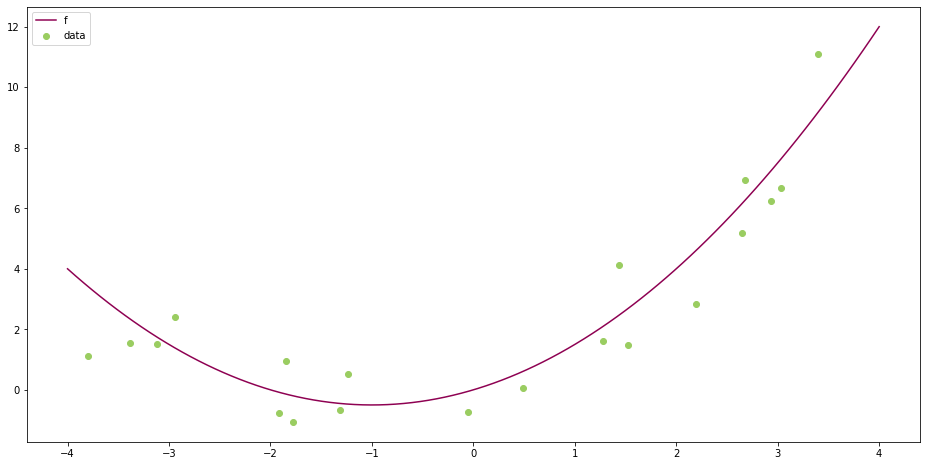

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,8))

scale = 4
f = lambda x: 0.5 * x**2 + x
colors = color=plt.cm.PiYG(np.linspace(0,1,5))

x = np.linspace(-scale, scale, 100);
y = f(x)

# plot real function
plt.plot(x,y, color = colors[0], label = 'f')

# scatter plot
x_scatter = 2*scale * np.random.rand(20,) - scale
y_scatter = f(x_scatter) + np.random.normal(size=(20,))
plt.scatter(x_scatter, y_scatter, color = colors[3], marker = 'o', label = 'data')

plt.legend();

Deshalb ist es naheliegend die Gleichheit nur approximativ zu erfüllen, man könnte also alle Parameter $\theta_1,\ldots,\theta_M$ akzeptieren, die zu kleinen Fehlern im Gleichungssystem führen. Wie können wir aber solche Parameter mit einer nachvollziehbaren Rechenvorschrift berechnen ? Ein Ansatz dazu ist das Kleinstquadrate-Prinzip, dass schon von Gauss im frühen neunzehnten Jahrhundert angewandt wurde. Statt der Lösung eines Gleichungssystems betrachtet man nun die Lösung eines Optimierungsproblems, wir suchen $\theta_1,\ldots,\theta_M$ als Lösung von

```{math}
:label: eq:nonlinregoptim
\min \sum_{i=1}^N ( F(x_i,\theta_1,\ldots,\theta_M) - y_i)^2.
```

Wir minimieren also in Summe den quadratischen Abstand zwischen der Modellvorhersage und den gemessenen Daten.
Da wir eine Summe von Quadraten, also nichtnegativen Termen, haben, sehen wir sofort dass der Minimalwert selbst bei optimaler Wahl der $\theta_i$ größer oder gleich Null liegen muss. Damit sehen wir sofort, dass eine Lösung des Gleichungssystems {eq}`eq:nonlinreg` auch immer eine Lösung des Optimierungsproblems {eq}`eq:nonlinregoptim` ist.

Mathematisch und praktisch stellen sich dabei sofort einige Fragen:

* Gibt es überhaupt eine Lösung des Problems ?

* Wenn ja, wie können wir das Minimum berechnen ?

* Ist das Problem robust gegenüber Messfehlern, d.h. ändert sich die Lösung nur wenig wenn wir die Daten $x_i$ und $y_i$ geringfügig ändern ?

* Was passiert mit der Lösung wenn wir weitere Messungen machen, d.h. wenn sich $N$ ändert ?

## Lineare Regression

Wir wollen die obigen Fragen nun im Rahmen der linearen Regression näher betrachten, dort wollen wir eine Funktion von zwei Variablen

```{math}
 f(\theta_1,\theta_2) =  \sum_{i=1}^N (\theta_1 x_i + \theta_2 -y_i)^2 
```

minimieren.

Um eine erste Idee zu bekommen, nehmen wir an $\theta_2 = 0$ ist schon bekannt. Dann bleibt uns nur eine eindimensionale Minimierung der quadratischen Funktion

```{math}
 g(\theta_1) =  \sum_{i=1}^N (\theta_1 x_i   -y_i)^2 .
```

Wir bestimmen das Minimum durch Ableitung mit Kettenregel:

```{math}
 g'(\theta_1) = 2 \sum_{i=1}^N x_i (\theta_1 x_i   -y_i) = (2 \sum_i x_i^2) \theta_1 - 2 \sum_i x_i y_i. 
```

Also folgt als stationärer Punkt $g'(\overline{\theta}_1) = 0$

```{math}
 \overline{\theta}_1 = \frac{\sum_i x_i y_i}{\sum_i x_i^2}.
```

Zur Überprüfung berechnen wir auch noch die zweite Ableitung

```{math}
 g'(\theta_1) =  2 \sum_{i=1}^N x_i^2, 
```

die offensichtlich positiv ist, wenn wir nicht alle Messungen bei $x_i = 0$ durchgeführt haben. Also ist der stationäre Punkt auch wirklich ein Minimierer von $g$.

Nun betrachten wir analog den Fall, dass $\theta_1 = 0$ schon bekannt ist. In diesem Fall bleibt die quadratische Funktion

```{math}
  g(\theta_2) =  \sum_{i=1}^N (\theta_2   -y_i)^2 .
```

Hier erhalten wir als stationären Punkt

```{math}
 \overline{\theta}_2 = \frac{1}N  \sum_{i=1}^N y_i, 
```

also den Mittelwert der Daten $y_i$.

Daraus versuchen wir uns zu überlegen wie die Lösung im allgemeinen Fall aussehen würde. Um das optimale $\theta_1$ zu bestimmen, haben wir eigentlich den Fall oben, wenn wir statt $y_i$ die verschobenen Daten $y_i - \theta_2$ betrachten.
Dies f\"uhrt auf

```{math}
 \overline{\theta}_1 = \frac{\sum_{i=1}^N  x_i (y_i-\overline{\theta}_2)}{\sum_{i=1}^N  x_i^2}. 
```

Analog können wir im Problem f\"ur $\theta_2$ die verschobenen Daten $y_i - \theta_1 x_i$ betrachten und erhalten

```{math}
 \overline{\theta}_2 = \frac{1}N \sum_{i=1}^N   (y_i - \overline{\theta}_1 x_i). 
```

Wir haben also eigentlich ein Gleichungssystem der Form
\begin{align}
(\sum_{i=1}^N x_i^2) \theta_1 + (\sum_{i=1}^N x_i) \theta_2 &= \sum_{i=1}^N x_i y_i \\
(\sum_{i=1}^N x_i) \theta_1 + N \theta_2 &= \sum_{i=1}^N y_i
\end{align}
zu lösen. Daraus erhalten wir
\begin{align}
\overline{\theta}_1 &=  \frac{N \sum_{i=1}^N x_i y_i - (\sum_{i=1}^N x_i) (\sum_{i=1}^N y_i)}{N \sum_{i=1}^N x_i^2 - (\sum_{i=1}^N x_i)^2} \\
\overline{\theta}_2 &=  \frac{(\sum_{i=1}^N x_i^2) (\sum_{i=1}^N y_i) - (\sum_{i=1}^N x_i y_i) (\sum_{i=1}^N x_i)}{N \sum_{i=1}^N x_i^2 - (\sum_{i=1}^N x_i)^2}.
\end{align}
Wir beachten, dass die Ungleichung

```{math}
 (\sum_{i=1}^N x_i)^2 \leq N \sum_{i=1}^N x_i^2, 
```

auch bekannt als arithmetisch-quadratische Mittelungleichung

```{math}
 (\frac{1}N \sum_{i=1}^N x_i)^2 \leq \frac{1}N  \sum_{i=1}^N x_i^2
```

gilt, mit Gleichheit nur wenn $x_1=x_2=\ldots=x_N$. Hat man also nicht alle Messungen an der gleichen Stelle $x_1$ durchgeführt, dann ist der Nenner positiv, insbesondere nicht Null.
